Load all librarys

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

Load and create the data

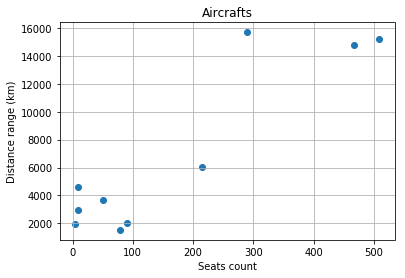

In [2]:
X=np.array([(4,1940),(9,2960),(9,4630),(78,1528),(90,2040),(50,3700),(467,14815),(509,15200),(290,15700),(215,6045)])

x1 = np.array(X[:,0])
x2 = np.array(X[:,1])

fig,ax= plt.subplots()
ax.scatter(x1,x2)
ax.set(xlabel='Seats count', ylabel='Distance range (km)',
       title='Aircrafts')
ax.grid()

plt.show()


In [3]:
#normalize the data
train_data = np.array(X)
max_values = train_data.max(0)

X_norm = np.divide(train_data,max_values)
x1_norm=np.array(X_norm[:,0])
x2_norm=np.array(X_norm[:,1])

ax_norm=plt.subplot()

ax_norm.scatter(x1_norm,x2_norm)
ax_norm.set(xlabel='Seats count', ylabel='Distance range (km)',
       title='Aircrafts')
ax_norm.grid()


Calculate variables necessery for distance measurement.

In [4]:
data_set=X_norm
groups = 2
space=[[0,1],[0,1]]

error_margin = 0.0001
m = 2.0

assignation=np.zeros((len(X),groups))
print(assignation)

cov=np.cov(X_norm.transpose())
cov_revers=np.linalg.inv(cov)
print("cov*cov^-1:\n",np.dot(cov,cov_revers))
print("cov:\n",cov)

#create random centroids
centers = []
def select_centers():
    global centers
    global groups
    global space
    iter=0
    while iter<groups:
        centers.append((random.uniform(space[0][0],space[0][1]), 
                        random.uniform(space[1][0],space[1][1])))
        iter=iter+1
        
select_centers()
print("centroids:",centers)

[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
cov*cov^-1:
 [[ 1.  0.]
 [ 0.  1.]]
cov:
 [[ 0.1407423   0.1289333 ]
 [ 0.1289333   0.14320383]]
centroids: [(0.7111223621823564, 0.697946030939557), (0.9686183549713892, 0.8185064011488496)]


In [5]:
def mahalanobis_distance (vec, mean):
    difference=(vec-mean)
    #print(difference)
    dist2=np.dot(difference,np.dot(cov_revers,difference))
    #print(dist2)
    return np.sqrt(dist2)

In [6]:
#cov=np.array([[1,0],[0,1]])
#cov_revers=np.linalg.inv(cov)
a=np.array([4,3])
b=np.array([0,0])

mahalanobis_distance(a,b)

11.457597806597636

In [7]:
def calculate_u(x, i):
    global centers
    if mahalanobis_distance(x, centers[0]) > mahalanobis_distance(x, centers[1]):
        return [0,1]
    else:
        return [1,0]
    
def calculate_new_centers(u):
    global centers
    new_centers=[]
    for c in range(groups):
        u_x_vector=np.zeros(2)
        u_scalar=0.0
        for i in range(len(data_set)):
            u_scalar = u_scalar+(u[i][c]**m)
            u_x_vector=np.add(u_x_vector,np.multiply(u[i][c]**m,data_set[i]))
        new_centers.append(np.divide(u_x_vector,u_scalar))
    print("    old center: ",centers,"\n    new center:", new_centers)
    centers=new_centers
    
def calculate_differences(new_assignation):
    global assignation
    #print(np.subtract(assignation,new_assignation))
    return np.sum(np.abs(np.subtract(assignation,new_assignation)))
    #return np.sum(np.abs(assignation-new_assignation))

def cluster():
    global assignation    
    global error_margin
    difference_limit_not_achieved=True
    iter=0
    
    while difference_limit_not_achieved:
        new_assignation=[]
        print("inter no: ",iter)
        for i in range(len(data_set)):
            new_assignation.append(calculate_u(data_set[i], iter))
        calculate_new_centers(new_assignation)
        if iter>0:
            if calculate_differences(new_assignation) < error_margin:
                difference_limit_not_achieved=False
        
        print("  assignation: ",assignation)
        print("  centers: ",centers)
        print("  difference:",calculate_differences(new_assignation))
        assignation=new_assignation
        iter=iter+1

In [8]:
cluster()

inter no:  0
    old center:  [(0.7111223621823564, 0.697946030939557), (0.9686183549713892, 0.8185064011488496)] 
    new center: [array([ 0.26457105,  0.37762208]), array([ 1.        ,  0.96815287])]
  assignation:  [[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
  centers:  [array([ 0.26457105,  0.37762208]), array([ 1.        ,  0.96815287])]
  difference: 10.0
inter no:  1
    old center:  [array([ 0.26457105,  0.37762208]), array([ 1.        ,  0.96815287])] 
    new center: [array([ 0.18295678,  0.30687102]), array([ 0.95874263,  0.95589172])]
  assignation:  [[1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [0, 1], [1, 0], [1, 0]]
  centers:  [array([ 0.18295678,  0.30687102]), array([ 0.95874263,  0.95589172])]
  difference: 2
inter no:  2
    old center:  [array([ 0.18295678,  0.30687102]), array([ 0.95874263,  0.95589172])] 
    new center: [array([ 0.18295678,  0.30687102]), array([ 0.95874263,  0.9558917

Własna wersja programu

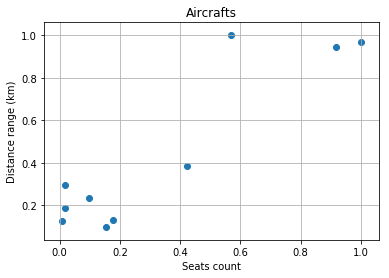

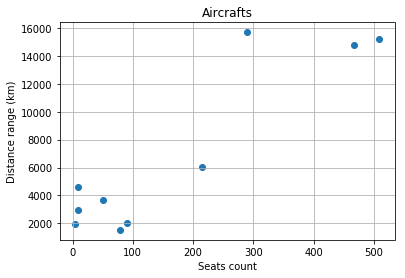

In [9]:
#wczytanie danych
X=np.array([(4,1940),(9,2960),(9,4630),(78,1528),(90,2040),(50,3700),(467,14815),(509,15200),(290,15700),(215,6045)])

x1 = np.array(X[:,0])
x2 = np.array(X[:,1])

fig,ax= plt.subplots()
ax.scatter(x1,x2)
ax.set(xlabel='Seats count', ylabel='Distance range (km)',
       title='Aircrafts')
ax.grid()

plt.show()

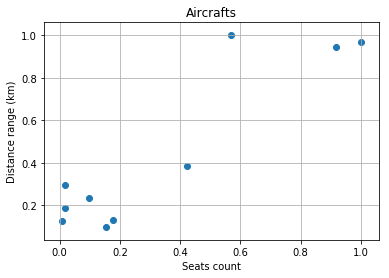

In [10]:
#normalize the data
train_data = np.array(X)
max_values = train_data.max(0)

X_norm = np.divide(train_data,max_values)
x1_norm=np.array(X_norm[:,0])
x2_norm=np.array(X_norm[:,1])

ax_norm=plt.subplot()

ax_norm.scatter(x1_norm,x2_norm)
ax_norm.set(xlabel='Seats count', ylabel='Distance range (km)',
       title='Aircrafts')
ax_norm.grid()

plt.show()

In [79]:
class model:
    #clusters=0
    #data_set
    #dimensions
    #centers
    #assignation
    #old_assignation
    m=2
               
    def print_model(self):
        print("Model after ",self.itertion," itereations:\n")
        print("  given number of clusters: ",self.clusters,"\n")
        #print("  centers:", self.means)
        print("  points assignation:\n", self.assignation,"\n  old    assignation:\n",self.old_assignation)
        print("  mean points according to weight avarage\n", self.mean)
        print("  etas for each point:\n",self.etas,"\n")
        print("  ****************************************\n \n")
        
    def cov(self,n):# covariance matrix for n-cluster
        return np.cov(self.data_set.transpose())
    
    def cov_rev(self,n):#reverse covariant matrix for n-cluster
        return np.linalg.inv(self.cov(n))
    
    def mahalanobis_distance (self, vec, cluster):
        #print("distance cluster", cluster)
        #print("distance vector", vec)
        mean=self.mean[cluster]
        difference=np.subtract(vec,mean[cluster])
        dist2=np.dot(difference,np.dot(self.rew_cov[cluster],difference))
        return np.sqrt(dist2)
    
    def calc_mean(self, dimension,cluster):
        temp=self.data_set[:,dimension]#*self.assignation[:,cluster]
        return np.mean(temp)
    
    def calc_means(self):
        self.mean=[]
        for j in range (0,self.clusters):
            temp=[]
            for i in range (0,self.dimensions):
                temp.append(self.calc_mean(i,j))
            self.mean.append(temp)
            
    def assignation_func(self,vec,cluster,i):
        return (1+(self.mahalanobis_distance(vec,cluster)/self.etas[i])**(2/(m-1)))**(-1)
    
    def eta(self,i):
        a=0
        b=0
        for j in range (0, self.clusters):
            a=a+((self.assignation[i,j]**m)*self.mahalanobis_distance(self.data_set[i,:],j)**2)
            b=b+((self.assignation[i,j])**m)
        return a/b
        
    def set_etas(self):
        self.etas=[]
        for i in range (0,len(self.data_set)):
            self.etas.append(self.eta(i))
    
    def iterate(self):
        self.itertion=self.itertion+1
        self.old_assignation=self.assignation.copy()  
        for i in range(0,len(self.assignation)):
            for j in range (0, self.clusters):
                #print(np.ndarray.tolist(self.data_set[i,:]),j)
                self.assignation[i,j]=self.assignation_func(self.data_set[i,:],j,i)
        
        self.set_etas()
        self.calc_means()
        self.print_model()
        
    def __init__(self, data, number_of_clusters):
        self.data_set=data
        self.clusters=number_of_clusters
        self.dimensions=int(len(self.data_set[0]))
        self.points=int(len(self.data_set))
        self.old_assignation=np.zeros((self.points,self.clusters))
        self.assignation=np.random.rand(self.points,self.clusters)
        self.rew_cov=[]
        self.centers=[]
        self.mean=self.centers
        self.itertion=0
        #self.cov=np.cov(self.data_set.transpose())
        #self.cov_revers=np.linalg.inv(self.cov)
        for i in range (0,self.clusters):
            self.centers.append(np.random.rand(self.dimensions))
            self.rew_cov.append(self.cov_rev(i))   
        self.set_etas()
        

In [81]:
ala=model(X_norm,2)
ala.print_model()
#ala.assignation_func([1,1],1)
for i in range (0,5):
    ala.iterate()

#ala.centers[1]

Model after  0  itereations:

  given number of clusters:  2 

  points assignation:
 [[ 0.83228904  0.19427212]
 [ 0.43109925  0.51101881]
 [ 0.43819013  0.23323762]
 [ 0.84619896  0.53928414]
 [ 0.22955166  0.75130351]
 [ 0.27811962  0.665473  ]
 [ 0.86615272  0.52455642]
 [ 0.60382511  0.12850004]
 [ 0.92826272  0.64760444]
 [ 0.50189013  0.14948295]] 
  old    assignation:
 [[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
  mean points according to weight avarage
 [array([ 0.74325396,  0.44657993]), array([ 0.6358585 ,  0.82932119])]
  etas for each point:
 [4.0064712175049806, 4.7360439406205108, 5.7866184423562324, 3.1581599977841139, 3.3683307663445197, 3.910154349726441, 0.23312368053205723, 0.46161839047182662, 7.1106738553535624, 0.93564797369333219] 

  ****************************************
 

Model after  1  itereations:

  given number of clusters:  2 

  points assignation:
 [[ 0.80216584  0.76679526]
 [ 0.8

In [13]:
a=[1,1]
a.append(99)
print(a)
b=[1,1,1]
np.subtract(a,b)

[1, 1, 99]


array([ 0,  0, 98])

In [14]:
print(X_norm)


[[ 0.00785855  0.12356688]
 [ 0.01768173  0.18853503]
 [ 0.01768173  0.29490446]
 [ 0.15324165  0.09732484]
 [ 0.17681729  0.12993631]
 [ 0.09823183  0.23566879]
 [ 0.91748527  0.94363057]
 [ 1.          0.96815287]
 [ 0.5697446   1.        ]
 [ 0.42239686  0.38503185]]
